In [2]:
import pandas as pd
import numpy as np

In [3]:
movies_df=pd.read_csv('movies.csv')

In [4]:
movies_df.shape

(9742, 3)

In [5]:
ratings_df=pd.read_csv('ratings.csv')

In [6]:
ratings_df.shape

(100836, 4)

In [4]:
movies_df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [9]:
unique = ratings_df.userId.unique()
unique

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
ratings_df.userId.value_counts()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64

In [13]:
rating_counts = ratings_df.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'rating_count']
merged_df = pd.merge(movies_df, rating_counts, on='movieId', how='inner')
rated_movie = merged_df.loc[merged_df['rating_count'].idxmax()]
print(f"Title: {rated_movie['title']}")
print(f"Movie ID: {rated_movie['movieId']}")
print(f"Number of Ratings: {rated_movie['rating_count']}")

Title: Forrest Gump (1994)
Movie ID: 356
Number of Ratings: 329


In [15]:
movie_id = movies_df[movies_df['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values
if len(movie_id) > 0:
    movie_id = movie_id[0]
    movie_ratings = ratings_df[ratings_df['movieId'] == movie_id]
    average_rating = movie_ratings['rating'].mean()
    print(average_rating)

3.970982142857143


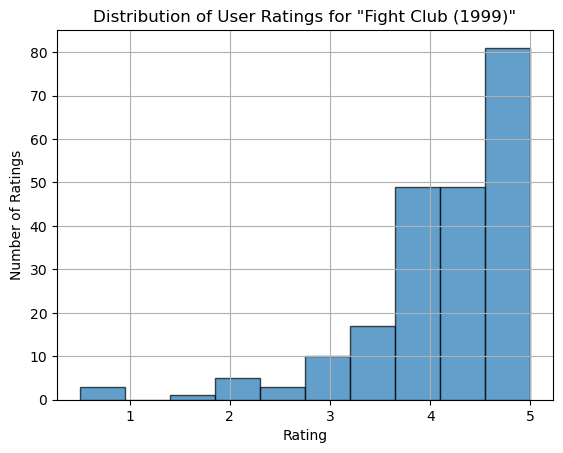

In [20]:
movie_id = movies_df[movies_df['title'] == "Fight Club (1999)"]['movieId'].values[0]
ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']
plt.hist(fight_club_ratings, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()


In [33]:
import pandas as pd
aggregation_results = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
aggregation_results.rename(columns={'count': 'rating_count', 'mean': 'average_rating'}, inplace=True)
print(aggregation_results.head())


         rating_count  average_rating
movieId                              
1                 215        3.920930
2                 110        3.431818
3                  52        3.259615
4                   7        2.357143
5                  49        3.071429


In [22]:
aggregation_results = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
aggregation_results.rename(columns={'count': 'rating_count', 'mean': 'average_rating'}, inplace=True)
merged_df = pd.merge(movies_df, aggregation_results, on='movieId', how='inner')
print(merged_df)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9720   193583               No Game No Life: Zero (2017)   
9721   193585                               Flint (2017)   
9722   193587        Bungo Stray Dogs: Dead Apple (2018)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  rating_count  \
0     Adventure|Animation|Children|Comedy|Fantasy           215   
1                      Adventure|Children|Fantasy           110   
2                                  Comedy|Romance            52   
3          

In [24]:
filtered_df = merged_df[merged_df['rating_count'] > 50]
print(filtered_df)


      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  \
0     Adventure|Animation|Children|Comedy|Fantasy           215   
1                      Adventure|Children|Fantasy           110   
2                                  Comedy|Romance            52   
5                           Action|Crime|Thriller           102   
6                                  Comedy|Romance   

In [25]:
most_popular_movie = filtered_df.loc[filtered_df['average_rating'].idxmax()]
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['average_rating']:.2f}")

Title: Shawshank Redemption, The (1994)
Average Rating: 4.43


In [27]:
rating_counts = ratings_df.groupby('movieId')['rating'].count()
rating_counts_df = rating_counts.reset_index()
rating_counts_df.columns = ['movieId', 'rating_count']
top_movies_df = pd.merge(movies_df, rating_counts_df, on='movieId', how='inner')
top_5_movies = top_movies_df.sort_values(by='rating_count', ascending=False).head(5)
print(top_5_movies[['title', 'rating_count']])


                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [30]:
rating_counts = ratings_df.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'rating_count']
merged_df = pd.merge(movies_df, rating_counts, on='movieId', how='inner')
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi = sci_fi_movies_sorted.iloc[2]
print(third_most_popular_sci_fi['title'])
print(third_most_popular_sci_fi['rating_count'])


Jurassic Park (1993)
238


In [38]:
links_df = pd.read_csv('links.csv')

In [39]:
links_df.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [31]:
links_df = pd.read_csv('links.csv')
rating_counts = ratings_df.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'rating_count']
merged_df = pd.merge(movies_df, rating_counts, on='movieId', how='inner')
merged_df = pd.merge(merged_df, links_df, on='movieId', how='inner')
popular_movies_df = merged_df[merged_df['rating_count'] > 50]
popular_movies_df

,movieId,title,genres,rating_count,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,113228,15602.0
5,6,Heat (1995),Action|Crime|Thriller,102,113277,949.0
6,7,Sabrina (1995),Comedy|Romance,54,114319,11860.0
...,...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,993846,106646.0
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,2278388,120467.0
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,816692,157336.0
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,2015381,118340.0


In [7]:
rating_counts = ratings_df.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'rating_count']
merged_df = pd.merge(movies_df, rating_counts, on='movieId', how='inner')
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi = sci_fi_movies_sorted.iloc[0]
print(third_most_popular_sci_fi['title'])
print(third_most_popular_sci_fi['rating_count'])

Matrix, The (1999)
278


In [8]:
matrix_movie_id = movies_df[movies_df['title'] == "Matrix, The (1999)"]['movieId']
if not matrix_movie_id.empty:
    print(matrix_movie_id.values[0])


2571
